In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
df = pd.read_csv('fraudTrain.csv')

In [4]:
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df.shape

(7815, 23)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7815 entries, 0 to 7814
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7815 non-null   int64  
 1   trans_date_trans_time  7815 non-null   object 
 2   cc_num                 7815 non-null   int64  
 3   merchant               7815 non-null   object 
 4   category               7815 non-null   object 
 5   amt                    7815 non-null   float64
 6   first                  7815 non-null   object 
 7   last                   7815 non-null   object 
 8   gender                 7814 non-null   object 
 9   street                 7814 non-null   object 
 10  city                   7814 non-null   object 
 11  state                  7814 non-null   object 
 12  zip                    7814 non-null   float64
 13  lat                    7814 non-null   float64
 14  long                   7814 non-null   float64
 15  city

In [8]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,7815.00000,7.815000e+03,7815.000000,7814.000000,7814.000000,7814.000000,7.814000e+03,7.814000e+03,7814.000000,7814.000000,7814.000000
mean,3907.00000,4.078117e+17,68.661363,49479.396340,38.595821,-90.688408,8.823451e+04,1.325583e+09,38.599153,-90.685832,0.005759
std,2256.14051,1.295068e+18,115.530027,27184.827244,5.198199,14.512405,2.944470e+05,1.359720e+05,5.226026,14.532152,0.075673
min,0.00000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,1953.50000,1.800184e+14,9.785000,26041.000000,34.852700,-97.235100,7.410000e+02,1.325448e+09,34.913072,-97.322865,0.000000
50%,3907.00000,3.518759e+15,48.490000,49259.000000,39.376400,-87.764400,2.395000e+03,1.325583e+09,39.392224,-87.772889,0.000000
75%,5860.50000,4.653879e+15,82.220000,72476.000000,41.846700,-80.143075,1.905400e+04,1.325704e+09,41.923981,-80.187209,0.000000
max,7814.00000,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325815e+09,66.645176,-66.967742,1.000000


In [9]:
df.is_fraud.value_counts()

is_fraud
0.0    7769
1.0      45
Name: count, dtype: int64

In [10]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
# Mengganti nilai null di kolom 'dob' dengan tanggal yang ditentukan (misalnya, 01/01/1970)
df['dob'].fillna('1970-01-01', inplace=True)
# Menghapus baris yang memiliki nilai null di kolom 'trans_num', 'unix_time', 'merch_lat', 'merch_long', dan 'is_fraud'
df.dropna(subset=['trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'], inplace=True)

In [12]:
# Count the occurrences of each class
class_counts = df['is_fraud'].value_counts()
# Calculate the class distribution
class_distribution = class_counts / len(df)
print(class_distribution)


is_fraud
0.0    0.994114
1.0    0.005758
Name: count, dtype: float64


In [13]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed')
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,0,Tuesday,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,0,Tuesday,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,0,Tuesday,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,0,Tuesday,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,0,Tuesday,1


In [14]:
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))
df[['merchant']].head()


,merchant
0,"Rippin, Kub and Mann"
1,"Heller, Gutmann and Zieme"
2,Lind-Buckridge
3,"Kutch, Hermiston and Farrell"
4,Keeling-Crist


In [18]:
# Mengisi nilai-nilai yang hilang dalam kolom 'dob' dengan tanggal yang dapat dikenali
df['dob'] = df['dob'].fillna(pd.to_datetime('1900-01-01'))

# Menghitung usia dengan mengurangkan tahun transaksi dari tahun lahir
df['age_cust'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year).astype(int)

# Menghapus kolom 'dob' setelah menghitung usia
df.drop(columns='dob', inplace=True)

# Menampilkan lima baris pertama dari DataFrame
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,age_cust
0,0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,0,Tuesday,1,31
1,1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,0,Tuesday,1,41
2,2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,0,Tuesday,1,57
3,3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,0,Tuesday,1,52
4,4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,0,Tuesday,1,33


In [21]:
df['lat_dist'] = abs(round(df['merch_lat']-df['lat'],2))
df['long_dist'] = abs(round(df['merch_long']-df['long'],2))
df.drop(columns=['lat','long','merch_lat','merch_long','trans_date_trans_time'],inplace=True)
df.head()
df.describe()
df.describe(include='object')

,merchant,category,first,last,gender,street,city,state,job,trans_num,day
count,7815,7815,7815,7815,7814,7814,7814,7814,7814,7814,7815
unique,693,14,331,460,2,897,827,50,473,7814,6
top,Gaylord-Powlowski,gas_transport,Christopher,Smith,F,43039 Riley Greens Suite 393,Birmingham,TX,"Designer, ceramics/pottery",0b242abb623afc578575680df30655b9,Tuesday
freq,27,819,155,163,4299,33,42,559,62,1,2414


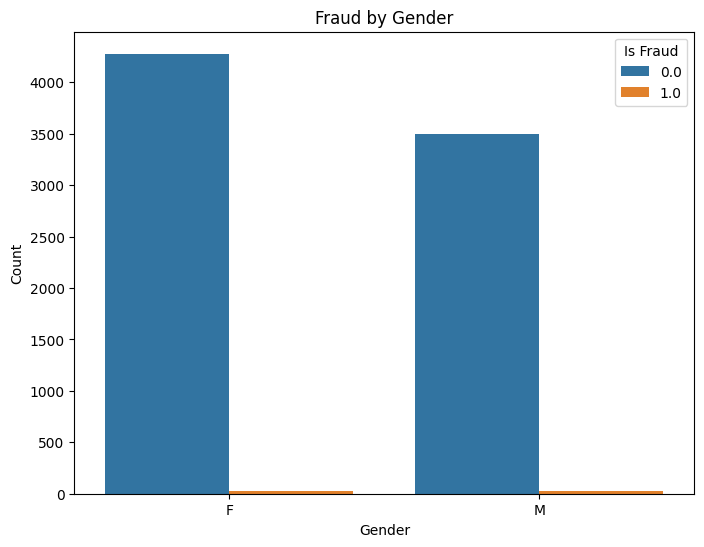

In [22]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'gender', hue ='is_fraud', data = df)
plt.title('Fraud by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title = 'Is Fraud')
plt.show()


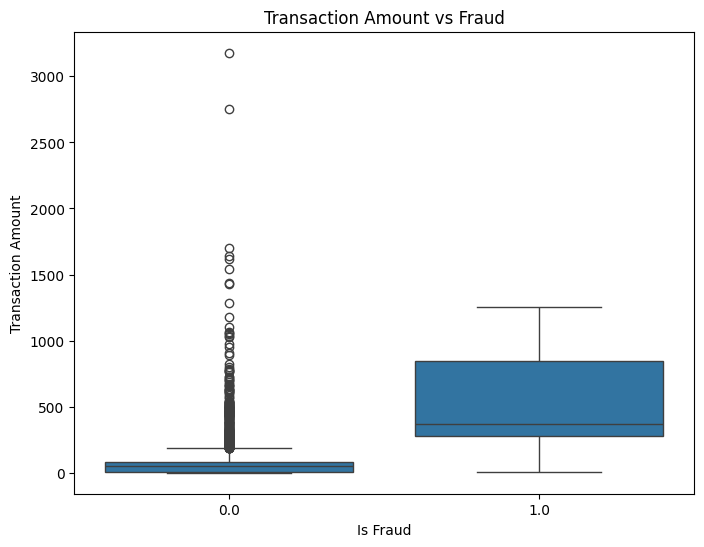

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'is_fraud' , y = 'amt' , data = df)
plt.title("Transaction Amount vs Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Koepp-Parker'),
  Text(1, 0, 'Moen, Reinger and Murphy'),
  Text(2, 0, 'Padberg-Welch'),
  Text(3, 0, 'Rau and Sons'),
  Text(4, 0, 'Ankunding LLC'),
  Text(5, 0, 'Barrows PLC'),
  Text(6, 0, 'Baumbach, Strosin and Nicolas'),
  Text(7, 0, 'Bins, Balistreri and Beatty'),
  Text(8, 0, 'Block-Parisian'),
  Text(9, 0, 'Conroy-Cruickshank')])

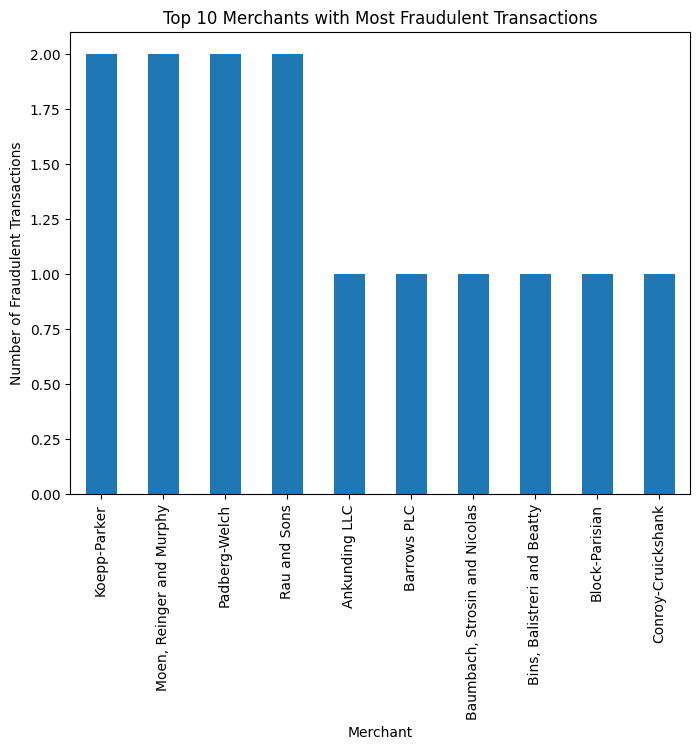

In [24]:
fraud_count_merch = df.groupby("merchant")["is_fraud"].sum()
top10_merch = fraud_count_merch.nlargest(10)
plt.figure(figsize=(8,6))
top10_merch.plot(kind="bar")
plt.xlabel("Merchant")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 Merchants with Most Fraudulent Transactions")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'grocery_pos'),
  Text(1, 0, 'shopping_net'),
  Text(2, 0, 'misc_net'),
  Text(3, 0, 'shopping_pos'),
  Text(4, 0, 'gas_transport'),
  Text(5, 0, 'grocery_net'),
  Text(6, 0, 'health_fitness'),
  Text(7, 0, 'kids_pets'),
  Text(8, 0, 'misc_pos'),
  Text(9, 0, 'travel')])

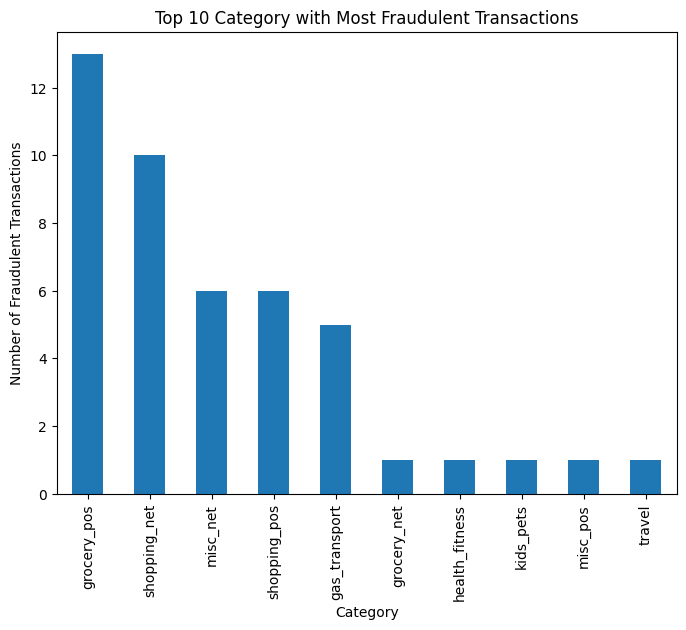

In [25]:
fraud_counts_cat = df.groupby("category")["is_fraud"].sum()
top10_cat = fraud_counts_cat.nlargest(10)
plt.figure(figsize=(8,6))
top10_cat.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 Category with Most Fraudulent Transactions")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Wales'),
  Text(1, 0, 'Manor'),
  Text(2, 0, 'Collettsville'),
  Text(3, 0, 'San Antonio'),
  Text(4, 0, 'Browning'),
  Text(5, 0, 'Achille'),
  Text(6, 0, 'Acworth'),
  Text(7, 0, 'Adams'),
  Text(8, 0, 'Afton'),
  Text(9, 0, 'Akron')])

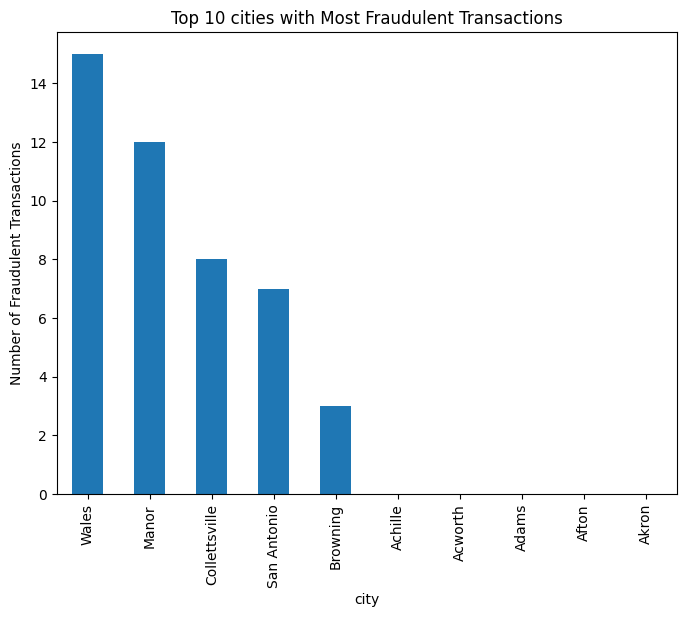

In [26]:
fraud_counts_city = df.groupby("city")["is_fraud"].sum()
plt.figure(figsize=(8,6))
fraud_counts_city.nlargest(10).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 cities with Most Fraudulent Transactions")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Administrator, education'),
  Text(1, 0, 'Public affairs consultant'),
  Text(2, 0, 'Soil scientist'),
  Text(3, 0, 'Horticultural consultant'),
  Text(4, 0, 'Cytogeneticist'),
  Text(5, 0, 'Academic librarian'),
  Text(6, 0, 'Accountant, chartered certified'),
  Text(7, 0, 'Accountant, chartered public finance'),
  Text(8, 0, 'Accounting technician'),
  Text(9, 0, 'Acupuncturist')])

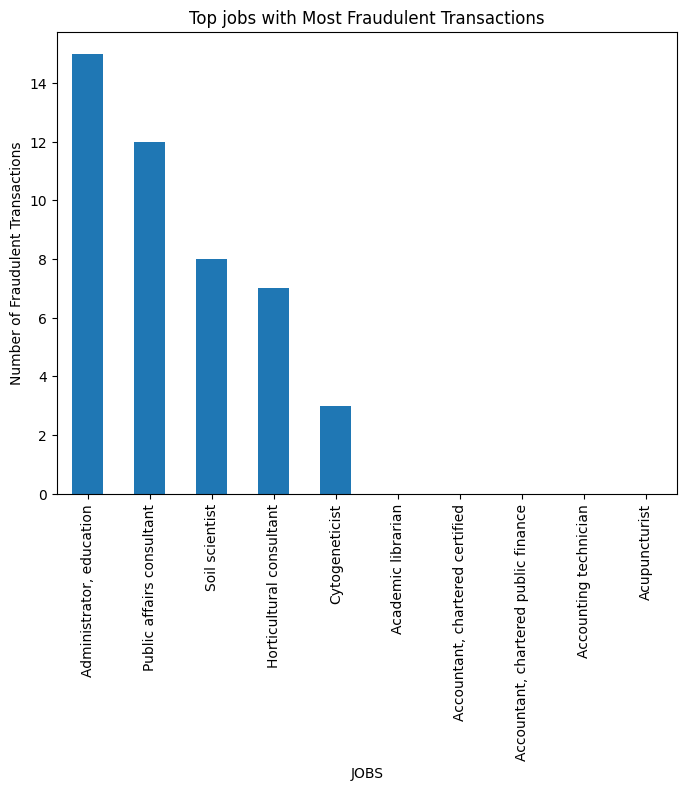

In [27]:
fraud_counts_job = df.groupby("job")["is_fraud"].sum()
top10_job = fraud_counts_job.nlargest(10)
plt.figure(figsize=(8,6))
top10_job.plot(kind="bar")
plt.xlabel("JOBS")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top jobs with Most Fraudulent Transactions")
plt.xticks(rotation=90)


,Unnamed: 0,cc_num,amt,first,last,street,state,zip,city_pop,trans_num,...,is_fraud,hour,month,age_cust,lat_dist,long_dist,age_group_Teen,age_group_Adult,age_group_Senior,gender_M
0,0,2703186189652095,4.97,Jennifer,Banks,561 Perry Cove,NC,28654.0,3495.0,0b242abb623afc578575680df30655b9,...,0.0,0,1,31,0.07,0.87,0,1,0,0
1,1,630423337322,107.23,Stephanie,Gill,43039 Riley Greens Suite 393,WA,99160.0,149.0,1f76529f8574734946361c461b024d99,...,0.0,0,1,41,0.27,0.02,0,1,0,0
2,2,38859492057661,220.11,Edward,Sanchez,594 White Dale Suite 530,ID,83252.0,4154.0,a1a22d70485983eac12b5b88dad1cf95,...,0.0,0,1,57,0.97,0.11,0,0,1,1
3,3,3534093764340240,45.00,Jeremy,White,9443 Cynthia Court Apt. 038,MT,59632.0,1939.0,6b849c168bdad6f867558c3793159a81,...,0.0,0,1,52,0.80,0.45,0,1,0,1
4,4,375534208663984,41.96,Tyler,Garcia,408 Bradley Rest,VA,24433.0,99.0,a41d7549acf90789359a9aa5346dcb46,...,0.0,0,1,33,0.25,0.83,0,1,0,1


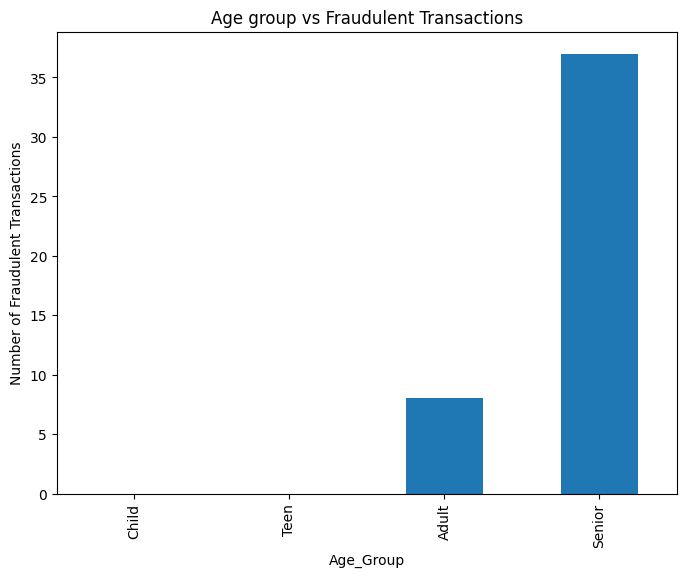

In [28]:
# Definisikan rentang usia
age_ranges = {
"Child": (0, 13),
"Teen": (13, 20),
"Adult": (20, 65),
"Senior": (65, None)
}
# Buat kolom age_group menggunakan pd.cut
df["age_group"] = pd.cut(df["age_cust"], bins=[0, 13, 20, 55, 90], labels=["Child", "Teen", "Adult", "Senior"], include_lowest=True)
# Plot jumlah transaksi fraud berdasarkan kelompok usia
fraud_counts_age = df.groupby("age_group")["is_fraud"].sum()
plt.figure(figsize=(8,6))
fraud_counts_age.plot(kind="bar")
plt.xlabel("Age_Group")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Age group vs Fraudulent Transactions")
plt.xticks(rotation=90)
# Menghapus kolom yang tidak diperlukan
df.drop(columns=['merchant', 'job', 'category', 'city', 'day'], inplace=True)
# Membuat dummy variables untuk kolom age_group dan gender
dummies = pd.get_dummies(df, drop_first=True, dtype="int32", columns=["age_group", "gender"])
new_df = dummies
new_df.head()


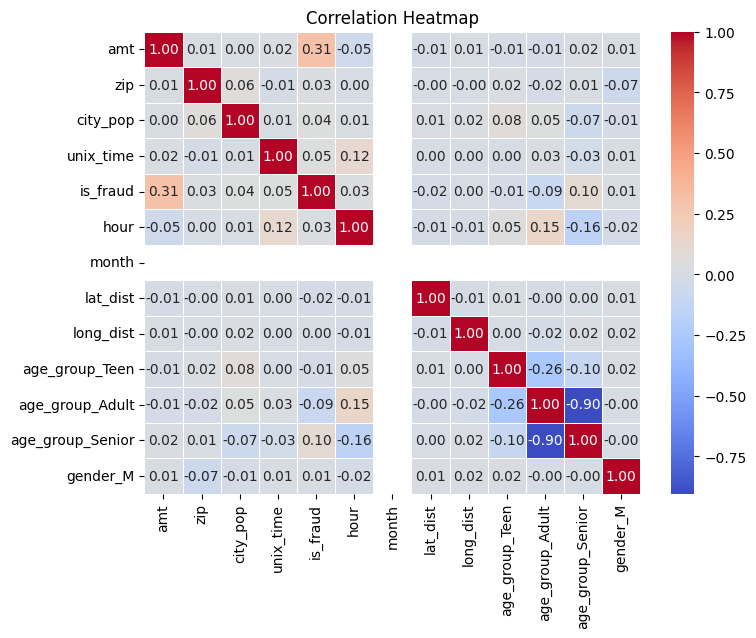

is_fraud            1.000000
amt                 0.306440
age_group_Senior    0.097575
age_group_Adult     0.086577
unix_time           0.046671
city_pop            0.041524
hour                0.028024
zip                 0.026653
lat_dist            0.018467
age_group_Teen      0.012924
gender_M            0.009375
long_dist           0.001035
month                    NaN
Name: is_fraud, dtype: float64


In [32]:
# Menghapus kolom-kolom non-numerik
numeric_df = new_df.select_dtypes(include=['int32', 'float64'])

# Hitung korelasi matrix
correlation_matrix = numeric_df.corr()

# Plotting heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Menghitung korelasi terhadap kolom target 'is_fraud'
fraud_correlation = numeric_df.corr()['is_fraud'].abs().sort_values(ascending=False)
print(fraud_correlation)


In [36]:
# Menghapus kolom-kolom non-numerik
X_train_numeric = X_train.select_dtypes(include=['int32', 'float64'])

# Skalasi fitur-fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Melatih model SVM
model = svm.SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# Transformasi data pengujian
X_test_numeric = X_test.select_dtypes(include=['int32', 'float64'])
X_test_scaled = scaler.transform(X_test_numeric)

# Memprediksi kelas pada set pengujian
y_pred = model.predict(X_test_scaled)

# Evaluasi model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[1552    0]
 [  11    0]]
Accuracy: 0.9929622520793346
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1552
         1.0       0.00      0.00      0.00        11

    accuracy                           0.99      1563
   macro avg       0.50      0.50      0.50      1563
weighted avg       0.99      0.99      0.99      1563



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
zero = new_df[new_df["is_fraud"]==0]
one = new_df[new_df["is_fraud"]==1]
down = resample(zero, replace=False, n_samples=len(one))
down
down_samples = pd.concat([one, down], axis=0)
down_samples

,Unnamed: 0,cc_num,amt,first,last,street,state,zip,city_pop,trans_num,...,is_fraud,hour,month,age_cust,lat_dist,long_dist,age_group_Teen,age_group_Adult,age_group_Senior,gender_M
2449,2449,4613314721966,281.06,Jason,Murphy,542 Steve Curve Suite 011,NC,28611.0,885.0,e8a81877ae9a0a7f883e15cb39dc4022,...,1.0,1,1,31,0.44,0.55,0,1,0,1
2472,2472,340187018810220,11.52,Misty,Hart,27954 Hall Mill Suite 575,TX,78208.0,1595797.0,bc7d41c41103877b03232f03f1f8d3f5,...,1.0,1,1,59,0.38,0.68,0,0,1,0
2523,2523,340187018810220,276.31,Misty,Hart,27954 Hall Mill Suite 575,TX,78208.0,1595797.0,b98f12f4168391b2203238813df5aa8c,...,1.0,3,1,59,0.17,0.38,0,0,1,0
2546,2546,4613314721966,7.03,Jason,Murphy,542 Steve Curve Suite 011,NC,28611.0,885.0,397894a5c4c02e3c61c784001f0f14e4,...,1.0,3,1,31,0.09,0.36,0,1,0,1
2553,2553,340187018810220,275.73,Misty,Hart,27954 Hall Mill Suite 575,TX,78208.0,1595797.0,7863235a750d73a244c07f1fb7f0185a,...,1.0,3,1,59,0.35,0.22,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864,3864,4119762878330989,97.09,Melinda,Gutierrez,1497 West Gateway,IL,61530.0,6713.0,34e9f83ec5a762d855b7943342373fc7,...,0.0,8,1,74,0.00,0.47,0,0,1,0
3597,3597,376445266762684,2.27,Rachel,Lowe,372 Jeffrey Course,NE,69165.0,1789.0,3780ed186743b98e485e3d8f1d76461f,...,0.0,1,1,37,0.36,0.69,0,1,0,0
6033,6033,213193596103206,75.56,James,Hunt,7369 Gabriel Tunnel,MI,49775.0,95.0,40cc3b6063d231aa56c3a328959ff1c9,...,0.0,21,1,25,0.60,0.76,0,1,0,1
3253,3253,180036456789979,33.04,Mackenzie,Salazar,982 Melissa Lock,WI,53801.0,878.0,3c13c334c37b7f8539de8c3e64360d10,...,0.0,19,1,45,0.55,0.21,0,1,0,0


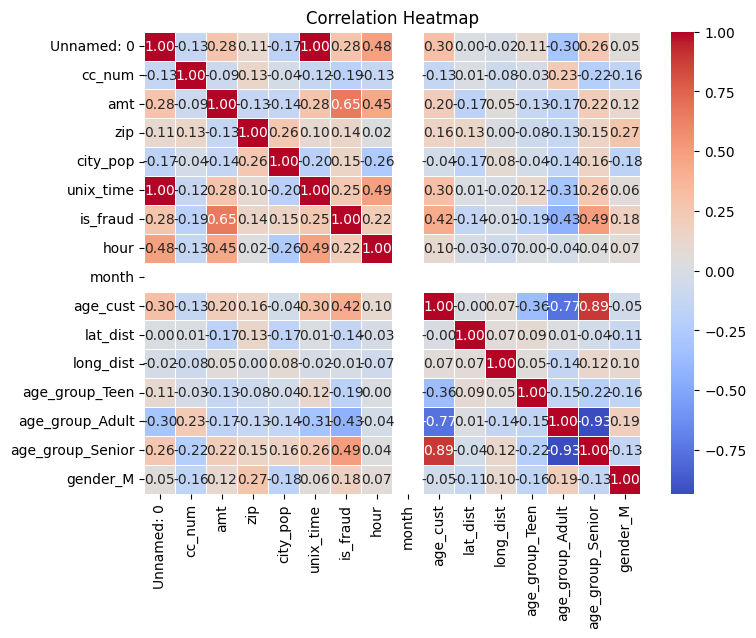

is_fraud            1.000000
amt                 0.652685
age_group_Senior    0.494913
age_group_Adult     0.433050
age_cust            0.421955
Unnamed: 0          0.275234
unix_time           0.250794
hour                0.215615
cc_num              0.185957
age_group_Teen      0.185695
gender_M            0.179969
city_pop            0.149948
zip                 0.144844
lat_dist            0.136037
long_dist           0.014719
month                    NaN
Name: is_fraud, dtype: float64


In [39]:
# Memilih hanya kolom-kolom numerik
numeric_data = down_samples.select_dtypes(include=['int32', 'int64', 'float32', 'float64'])

# Hitung korelasi matrix
correlation_matrix = numeric_data.corr()

# Plotting heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Menghitung korelasi terhadap kolom target 'is_fraud'
fraud_correlation = numeric_data.corr()['is_fraud'].abs().sort_values(ascending=False)
print(fraud_correlation)


In [41]:
# Identifikasi kolom-kolom dengan tipe data string
string_cols = X_d.select_dtypes(include=['object']).columns

# Lakukan one-hot encoding
X_d_encoded = pd.get_dummies(X_d, columns=string_cols, drop_first=True)

# Memisahkan data menjadi set pelatihan dan pengujian
X_tr, X_te, y_tr, y_te = train_test_split(X_d_encoded, y_d, train_size=0.8, random_state=65)

# Skalasi fitur-fitur numerik
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_te_scaled = scaler.transform(X_te)

# Melatih model SVM
model1 = svm.SVC(kernel='linear')
model1.fit(X_tr_scaled, y_tr)

# Memprediksi kelas pada set pengujian
y_pred1 = model1.predict(X_te_scaled)

# Evaluasi model
cm1 = confusion_matrix(y_te, y_pred1)
print("Confusion Matrix:\n", cm1)
print("Accuracy:", accuracy_score(y_te, y_pred1))
print("Classification Report:\n", classification_report(y_te, y_pred1))


Confusion Matrix:
 [[11  2]
 [ 0  5]]
Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        13
         1.0       0.71      1.00      0.83         5

    accuracy                           0.89        18
   macro avg       0.86      0.92      0.88        18
weighted avg       0.92      0.89      0.89        18



In [42]:
model2 = LogisticRegression()


In [43]:
# training the Logistic Regression Model with Training Data
model2.fit(X_tr, y_tr)
# accuracy on training data
y_pred2 = model2.predict(X_te)
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_te, y_pred2)
cnf_matrix
print("Accuracy:", accuracy_score(y_te, y_pred2))
print("Classification Report:\n", classification_report(y_te, y_pred2))

Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        13
         1.0       0.00      0.00      0.00         5

    accuracy                           0.72        18
   macro avg       0.36      0.50      0.42        18
weighted avg       0.52      0.72      0.61        18



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

In [49]:
model3 = DecisionTreeClassifier()

In [50]:
model3.fit(X_tr, y_tr)
y_pred3 = model3.predict(X_te)
conf_matrix = confusion_matrix(y_te, y_pred3)
print("Confusion Matrix:")
print(conf_matrix)
accuracy = accuracy_score(y_te, y_pred3)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_te, y_pred3))

Confusion Matrix:
[[13  0]
 [ 1  4]]
Accuracy: 0.94
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        13
         1.0       1.00      0.80      0.89         5

    accuracy                           0.94        18
   macro avg       0.96      0.90      0.93        18
weighted avg       0.95      0.94      0.94        18



In [51]:
model4 = RandomForestClassifier()

In [52]:
model4.fit(X_tr, y_tr)
y_pred4 = model4.predict(X_te)
conf_matrix = confusion_matrix(y_te, y_pred4)
print("Confusion Matrix:")
print(conf_matrix)
accuracy = accuracy_score(y_te, y_pred4)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_te, y_pred4))

Confusion Matrix:
[[13  0]
 [ 0  5]]
Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [53]:
model5 = AdaBoostClassifier()

In [65]:
model5.fit(X_tr, y_tr)
y_pred5 = model5.predict(X_te)
conf_matrix = confusion_matrix(y_te, y_pred5)
print("Confusion Matrix:")
print(conf_matrix)
accuracy = accuracy_score(y_te, y_pred5)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_te, y_pred5))

Confusion Matrix:
[[13  0]
 [ 1  4]]
Accuracy: 0.94
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        13
         1.0       1.00      0.80      0.89         5

    accuracy                           0.94        18
   macro avg       0.96      0.90      0.93        18
weighted avg       0.95      0.94      0.94        18



In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

In [80]:

# Membuat dataset contoh (ganti dengan dataset Anda)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Mendefinisikan daftar hyperparameter yang akan diuji
param_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Inisialisasi model Adaboost
adaboost = AdaBoostClassifier(random_state=42)

# Membuat objek RandomizedSearchCV
random_search_adaboost = RandomizedSearchCV(estimator=adaboost,
                                            param_distributions=param_adaboost,
                                            n_iter=10,
                                            cv=5,
                                            random_state=42)

# Melakukan pencarian hyperparameter terbaik
random_search_adaboost.fit(X, y)

# Menampilkan hyperparameter terbaik
print("Best Parameters:", random_search_adaboost.best_params_)


Best Parameters: {'n_estimators': 200, 'learning_rate': 1.0, 'algorithm': 'SAMME'}
